# **Analysis of NVSS Provisional COVID-19 deaths.**

Team Members


1.   Akash Sharma
2.   Khirabdhi Tanaya Acharya
3.   Akanksha Jamwal
4.   Kavya Vijay
5.   Kanishka Singh


•	This dataset contains deaths involving coronavirus disease 2019 (COVID-19) and pneumonia reported to NCHS by jurisdiction of occurrence, place of death, and age group.

•	Source- National Center for Health Statistics

•	Source Link - https://data.cdc.gov/NCHS/Provisional-COVID-19-Deaths-by-Place-of-Death-and-/4va6-ph5s


**Importing Packages**

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # for a qqplot
import seaborn as sns
from scipy.stats import ttest_ind # just the t-test from scipy.stats
from scipy.stats import probplot # for a qqplot
import pylab #
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
!pip install researchpy
import researchpy as rp

import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import datetime
from datetime import date
import matplotlib
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings
warnings.filterwarnings('ignore')
!pip install -U dataprep

     |████████████████████████████████| 3.5 MB 4.1 MB/s 
     |████████████████████████████████| 10.1 MB 36.3 MB/s 
     |████████████████████████████████| 848 kB 37.3 MB/s 
     |████████████████████████████████| 63 kB 2.5 MB/s 
     |████████████████████████████████| 366 kB 41.4 MB/s 
     |████████████████████████████████| 943 kB 45.9 MB/s 
     |████████████████████████████████| 719 kB 48.9 MB/s 
     |████████████████████████████████| 1.1 MB 39.9 MB/s 
     |████████████████████████████████| 158 kB 58.9 MB/s 
     |████████████████████████████████| 1.5 MB 57.2 MB/s 
     |████████████████████████████████| 271 kB 48.5 MB/s 
     |████████████████████████████████| 192 kB 64.0 MB/s 
     |████████████████████████████████| 160 kB 50.8 MB/s 
     |████████████████████████████████| 132 kB 62.7 MB/s 
     |████████████████████████████████| 49 kB 5.0 MB/s 
     |████████████████████████████████| 1.5 MB 41.5 MB/s 
     |████████████████████████████████| 743 kB 42.3 MB/s 
  Created wheel fo

**Importing Data**


In [ ]:
# Load data set
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
covid = pd.read_csv('/content/drive/MyDrive/Provisional_COVID-19_Deaths_by_Place_of_Death_and_Age (3).csv')


View top data to get overview

In [ ]:
covid.head()



,Data as of,Start Date,End Date,Group,Year,Month,HHS Region,State,Place of Death,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,11/10/2021,01/01/2020,11/06/2021,By Total,NaN,NaN,0,United States,Total - All Places of Death,All Ages,756961.0,6153710.0,679284.0,389170.0,9418.0,1055132.0,NaN
1,11/10/2021,01/01/2020,11/06/2021,By Total,NaN,NaN,0,United States,Total - All Places of Death,0-17 years,595.0,61522.0,1088.0,157.0,189.0,1715.0,NaN
2,11/10/2021,01/01/2020,11/06/2021,By Total,NaN,NaN,0,United States,Total - All Places of Death,18-29 years,4382.0,117282.0,3998.0,2131.0,149.0,6386.0,NaN
3,11/10/2021,01/01/2020,11/06/2021,By Total,NaN,NaN,0,United States,Total - All Places of Death,30-39 years,12930.0,170954.0,10761.0,6736.0,325.0,17255.0,NaN
4,11/10/2021,01/01/2020,11/06/2021,By Total,NaN,NaN,0,United States,Total - All Places of Death,40-49 years,31624.0,255840.0,25328.0,17069.0,511.0,40320.0,NaN


1. Based on initial analysis we can see that some columns are not required not further analysis.
2. We will filter the 'Group' column by year to find yearly mortality rate.
3. We will remove rows and columns which do not contain information for further analysis.

In [ ]:
#finding null values
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113724 entries, 0 to 113723
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Data as of                                113724 non-null  object 
 1   Start Date                                113724 non-null  object 
 2   End Date                                  113724 non-null  object 
 3   Group                                     113724 non-null  object 
 4   Year                                      109350 non-null  float64
 5   Month                                     100602 non-null  float64
 6   HHS Region                                113724 non-null  int64  
 7   State                                     113724 non-null  object 
 8   Place of Death                            113724 non-null  object 
 9   Age group                                 113724 non-null  object 
 10  COVID-19 Deaths     

From above we can that certain columns have null values.We will deal with this in next step.

Also the Data Type of Year,Month is shown as float64, so we will convert this to integer 

In [ ]:
covid.isnull().sum()

Data as of                                      0
Start Date                                      0
End Date                                        0
Group                                           0
Year                                         4374
Month                                       13122
HHS Region                                      0
State                                           0
Place of Death                                  0
Age group                                       0
COVID-19 Deaths                             25059
Total Deaths                                20778
Pneumonia Deaths                            29418
Pneumonia and COVID-19 Deaths               21679
Influenza Deaths                            10219
Pneumonia, Influenza, or COVID-19 Deaths    29382
Footnote                                    48060
dtype: int64

We will be grouping our data in terms of Month and Year to deal with missing values in Month and Year column.

We will then replace blank values in other observation as zero to make our analysis much clearer. 

In [ ]:
covid = covid.replace(np.nan, 0)
covid.isnull().sum()

Data as of                                  0
Start Date                                  0
End Date                                    0
Group                                       0
Year                                        0
Month                                       0
HHS Region                                  0
State                                       0
Place of Death                              0
Age group                                   0
COVID-19 Deaths                             0
Total Deaths                                0
Pneumonia Deaths                            0
Pneumonia and COVID-19 Deaths               0
Influenza Deaths                            0
Pneumonia, Influenza, or COVID-19 Deaths    0
Footnote                                    0
dtype: int64

**Changing data type of Month and Year column**


In [ ]:
covid.Year=covid.Year.astype(int)
covid.Month=covid.Month.astype(int)

covid.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113724 entries, 0 to 113723
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Data as of                                113724 non-null  object 
 1   Start Date                                113724 non-null  object 
 2   End Date                                  113724 non-null  object 
 3   Group                                     113724 non-null  object 
 4   Year                                      113724 non-null  int64  
 5   Month                                     113724 non-null  int64  
 6   HHS Region                                113724 non-null  int64  
 7   State                                     113724 non-null  object 
 8   Place of Death                            113724 non-null  object 
 9   Age group                                 113724 non-null  object 
 10  COVID-19 Deaths     

**Analyzing Variables**

In [ ]:
#COVID-19 Deaths Variable analysis
round(covid['COVID-19 Deaths'].describe())

count    113724.0
mean        159.0
std        3905.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max      756961.0
Name: COVID-19 Deaths, dtype: float64

In [ ]:
#Pneumonia Deaths Variable analysis
round(covid['Pneumonia Deaths'].describe())

count    113724.0
mean        143.0
std        3590.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max      679284.0
Name: Pneumonia Deaths, dtype: float64

Relationship between Covid-19 deaths and Pneumonia Deaths


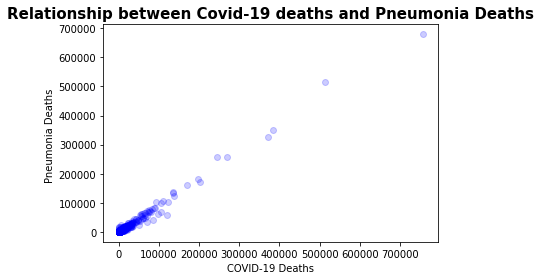

In [ ]:
scatter = plt.scatter(
           covid['COVID-19 Deaths'],covid['Pneumonia Deaths'],
           alpha = 0.2,
                     color = 'Blue')
plt.title("Relationship between Covid-19 deaths and Pneumonia Deaths",
         fontsize = 15, weight = 'bold'
         )
plt.xlabel("COVID-19 Deaths")
plt.ylabel("Pneumonia Deaths ")
plt.show()



**Categorical variables**

In [ ]:
covid.dropna(inplace=True)

Analyzing columns : State,Place of death, Group.


In [ ]:
covid['State'].describe()

count            113724
unique               54
top       Massachusetts
freq               2106
Name: State, dtype: object

In [ ]:
covid['Place of Death'].describe()

count               113724
unique                   9
top       Hospice facility
freq                 12636
Name: Place of Death, dtype: object

In [ ]:
covid['Age group'].describe()

count          113724
unique              9
top       18-29 years
freq            12636
Name: Age group, dtype: object

In [ ]:
covid['Group'].value_counts()

By Month    100602
By Year       8748
By Total      4374
Name: Group, dtype: int64

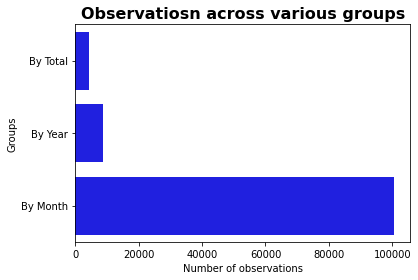

In [ ]:
#observations by various groups
sns.countplot(data=covid, y='Group', color = 'blue')
plt.title("Observatiosn across various groups", fontsize = 16, fontweight = 'bold')
plt.xlabel("Number of observations", fontsize = 10)
plt.ylabel("Groups", fontsize = 10)
plt.show()

In [ ]:
## Data Transformation

**Removing columns which are not required for analysis.**

In [ ]:
covid_drop = covid.drop(columns=['Data as of', 'HHS Region', 'Footnote'])
covid_drop


,Start Date,End Date,Group,Year,Month,State,Place of Death,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
0,01/01/2020,11/06/2021,By Total,0,0,United States,Total - All Places of Death,All Ages,756961.0,6153710.0,679284.0,389170.0,9418.0,1055132.0
1,01/01/2020,11/06/2021,By Total,0,0,United States,Total - All Places of Death,0-17 years,595.0,61522.0,1088.0,157.0,189.0,1715.0
2,01/01/2020,11/06/2021,By Total,0,0,United States,Total - All Places of Death,18-29 years,4382.0,117282.0,3998.0,2131.0,149.0,6386.0
3,01/01/2020,11/06/2021,By Total,0,0,United States,Total - All Places of Death,30-39 years,12930.0,170954.0,10761.0,6736.0,325.0,17255.0
4,01/01/2020,11/06/2021,By Total,0,0,United States,Total - All Places of Death,40-49 years,31624.0,255840.0,25328.0,17069.0,511.0,40320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113719,11/01/2021,11/06/2021,By Month,2021,11,Puerto Rico,Place of death unknown,40-49 years,0.0,0.0,0.0,0.0,0.0,0.0
113720,11/01/2021,11/06/2021,By Month,2021,11,Puerto Rico,Place of death unknown,50-64 years,0.0,0.0,0.0,0.0,0.0,0.0
113721,11/01/2021,11/06/2021,By Month,2021,11,Puerto Rico,Place of death unknown,65-74 years,0.0,0.0,0.0,0.0,0.0,0.0
113722,11/01/2021,11/06/2021,By Month,2021,11,Puerto Rico,Place of death unknown,75-84 years,0.0,0.0,0.0,0.0,0.0,0.0


**Filtering data as per requirement for understanding of data**

In [ ]:
#Now dividing data into groups like year for further analysis.
covid_Y = covid_drop[covid_drop["Group"] == "By Year"]
covid_Y = covid_Y.drop(columns=['Month'])
covid_Y

,Start Date,End Date,Group,Year,State,Place of Death,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
4374,01/01/2020,12/31/2020,By Year,2020,United States,Total - All Places of Death,All Ages,385325.0,3387999.0,351825.0,179938.0,8786.0,564847.0
4375,01/01/2020,12/31/2020,By Year,2020,United States,Total - All Places of Death,0-17 years,198.0,34073.0,625.0,36.0,179.0,966.0
4376,01/01/2020,12/31/2020,By Year,2020,United States,Total - All Places of Death,18-29 years,1481.0,63213.0,1764.0,600.0,145.0,2779.0
4377,01/01/2020,12/31/2020,By Year,2020,United States,Total - All Places of Death,30-39 years,4286.0,88968.0,4122.0,1845.0,314.0,6855.0
4378,01/01/2020,12/31/2020,By Year,2020,United States,Total - All Places of Death,40-49 years,11316.0,133178.0,10184.0,5302.0,489.0,16619.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13117,01/01/2021,11/06/2021,By Year,2021,Puerto Rico,Place of death unknown,40-49 years,0.0,0.0,0.0,0.0,0.0,0.0
13118,01/01/2021,11/06/2021,By Year,2021,Puerto Rico,Place of death unknown,50-64 years,0.0,0.0,0.0,0.0,0.0,0.0
13119,01/01/2021,11/06/2021,By Year,2021,Puerto Rico,Place of death unknown,65-74 years,0.0,0.0,0.0,0.0,0.0,0.0
13120,01/01/2021,11/06/2021,By Year,2021,Puerto Rico,Place of death unknown,75-84 years,0.0,10.0,0.0,0.0,0.0,0.0


In [ ]:
covid_Y1=covid_Y[(covid_Y['State']!='United States') & (covid_Y['Place of Death']== 'Total - All Places of Death') & (covid_Y['Age group']== 'All Ages') & (covid_Y['Year']== 2020)]

In [ ]:
covid_Y1

,Start Date,End Date,Group,Year,State,Place of Death,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
4536,01/01/2020,12/31/2020,By Year,2020,Alabama,Total - All Places of Death,All Ages,6706.0,63362.0,5213.0,2177.0,140.0,9870.0
4698,01/01/2020,12/31/2020,By Year,2020,Alaska,Total - All Places of Death,All Ages,254.0,5008.0,312.0,142.0,10.0,434.0
4860,01/01/2020,12/31/2020,By Year,2020,Arizona,Total - All Places of Death,All Ages,9321.0,77079.0,9212.0,5442.0,148.0,13237.0
5022,01/01/2020,12/31/2020,By Year,2020,Arkansas,Total - All Places of Death,All Ages,4027.0,37818.0,3902.0,1810.0,102.0,6215.0
5184,01/01/2020,12/31/2020,By Year,2020,California,Total - All Places of Death,All Ages,33523.0,320572.0,36987.0,18769.0,819.0,52549.0
5346,01/01/2020,12/31/2020,By Year,2020,Colorado,Total - All Places of Death,All Ages,5073.0,47592.0,4593.0,2503.0,139.0,7297.0
5508,01/01/2020,12/31/2020,By Year,2020,Connecticut,Total - All Places of Death,All Ages,6291.0,38106.0,3184.0,1591.0,92.0,7973.0
5670,01/01/2020,12/31/2020,By Year,2020,Delaware,Total - All Places of Death,All Ages,1097.0,10990.0,914.0,458.0,25.0,1578.0
5832,01/01/2020,12/31/2020,By Year,2020,District of Columbia,Total - All Places of Death,All Ages,1004.0,7456.0,1345.0,932.0,12.0,1429.0
5994,01/01/2020,12/31/2020,By Year,2020,Florida,Total - All Places of Death,All Ages,21827.0,243066.0,25438.0,12486.0,486.0,35230.0


**In order to find the states reporting maximun mortality rates we will filter out such states using 'nlargest' function.** 


In [ ]:
A1=covid_Y1.nlargest(10,["COVID-19 Deaths"])
A1

,Start Date,End Date,Group,Year,State,Place of Death,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
11664,01/01/2020,12/31/2020,By Year,2020,Texas,Total - All Places of Death,All Ages,33542.0,253688.0,31667.0,18030.0,578.0,47720.0
5184,01/01/2020,12/31/2020,By Year,2020,California,Total - All Places of Death,All Ages,33523.0,320572.0,36987.0,18769.0,819.0,52549.0
9882,01/01/2020,12/31/2020,By Year,2020,New York City,Total - All Places of Death,All Ages,22284.0,82146.0,12963.0,8423.0,1022.0,27011.0
5994,01/01/2020,12/31/2020,By Year,2020,Florida,Total - All Places of Death,All Ages,21827.0,243066.0,25438.0,12486.0,486.0,35230.0
10854,01/01/2020,12/31/2020,By Year,2020,Pennsylvania,Total - All Places of Death,All Ages,18407.0,156603.0,13644.0,6985.0,333.0,25388.0
9396,01/01/2020,12/31/2020,By Year,2020,New Jersey,Total - All Places of Death,All Ages,18142.0,95517.0,13283.0,8833.0,155.0,22732.0
6642,01/01/2020,12/31/2020,By Year,2020,Illinois,Total - All Places of Death,All Ages,16721.0,128720.0,14413.0,8017.0,223.0,23335.0
9720,01/01/2020,12/31/2020,By Year,2020,New York,Total - All Places of Death,All Ages,16126.0,119245.0,15005.0,7292.0,278.0,24094.0
10368,01/01/2020,12/31/2020,By Year,2020,Ohio,Total - All Places of Death,All Ages,15097.0,143943.0,12777.0,6687.0,317.0,21502.0
8100,01/01/2020,12/31/2020,By Year,2020,Michigan,Total - All Places of Death,All Ages,12286.0,115319.0,11564.0,6062.0,284.0,18058.0


## Answer to individual analysis questions

Text(0.5, 1.0, 'Top 10 states with maximum mortality rate in 2020')

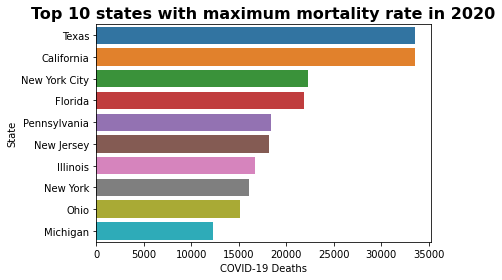

In [ ]:

#Q1.Top 10 states with maximum mortality rate in 2020.
sns.barplot(x = 'COVID-19 Deaths',y = 'State',data = A1)
plt.title("Top 10 states with maximum mortality rate in 2020", fontsize = 16, fontweight = 'bold')


Text(0.5, 1.0, 'Comparison between COVID 19 death rate and Influeza death rate')

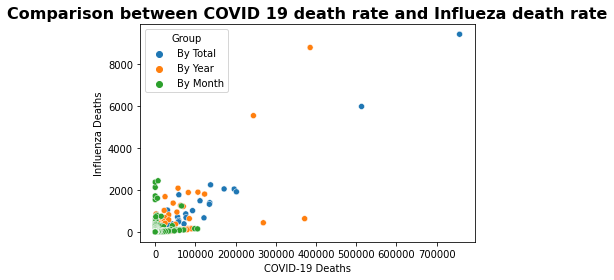

In [ ]:
#Q2 Comparison between COVID 19 death rate and Influeza death rate by the classification of total,Year and Month. Which Disease is more dangerous as compared to other.
#Ans COVID-19 is more deadly as compared to Influenza disease as per the plot.
sns.scatterplot(x="COVID-19 Deaths", y="Influenza Deaths", hue="Group", data=covid)
plt.title("Comparison between COVID 19 death rate and Influeza death rate",fontsize = 16, fontweight = 'bold')

<Figure size 800x640 with 0 Axes>

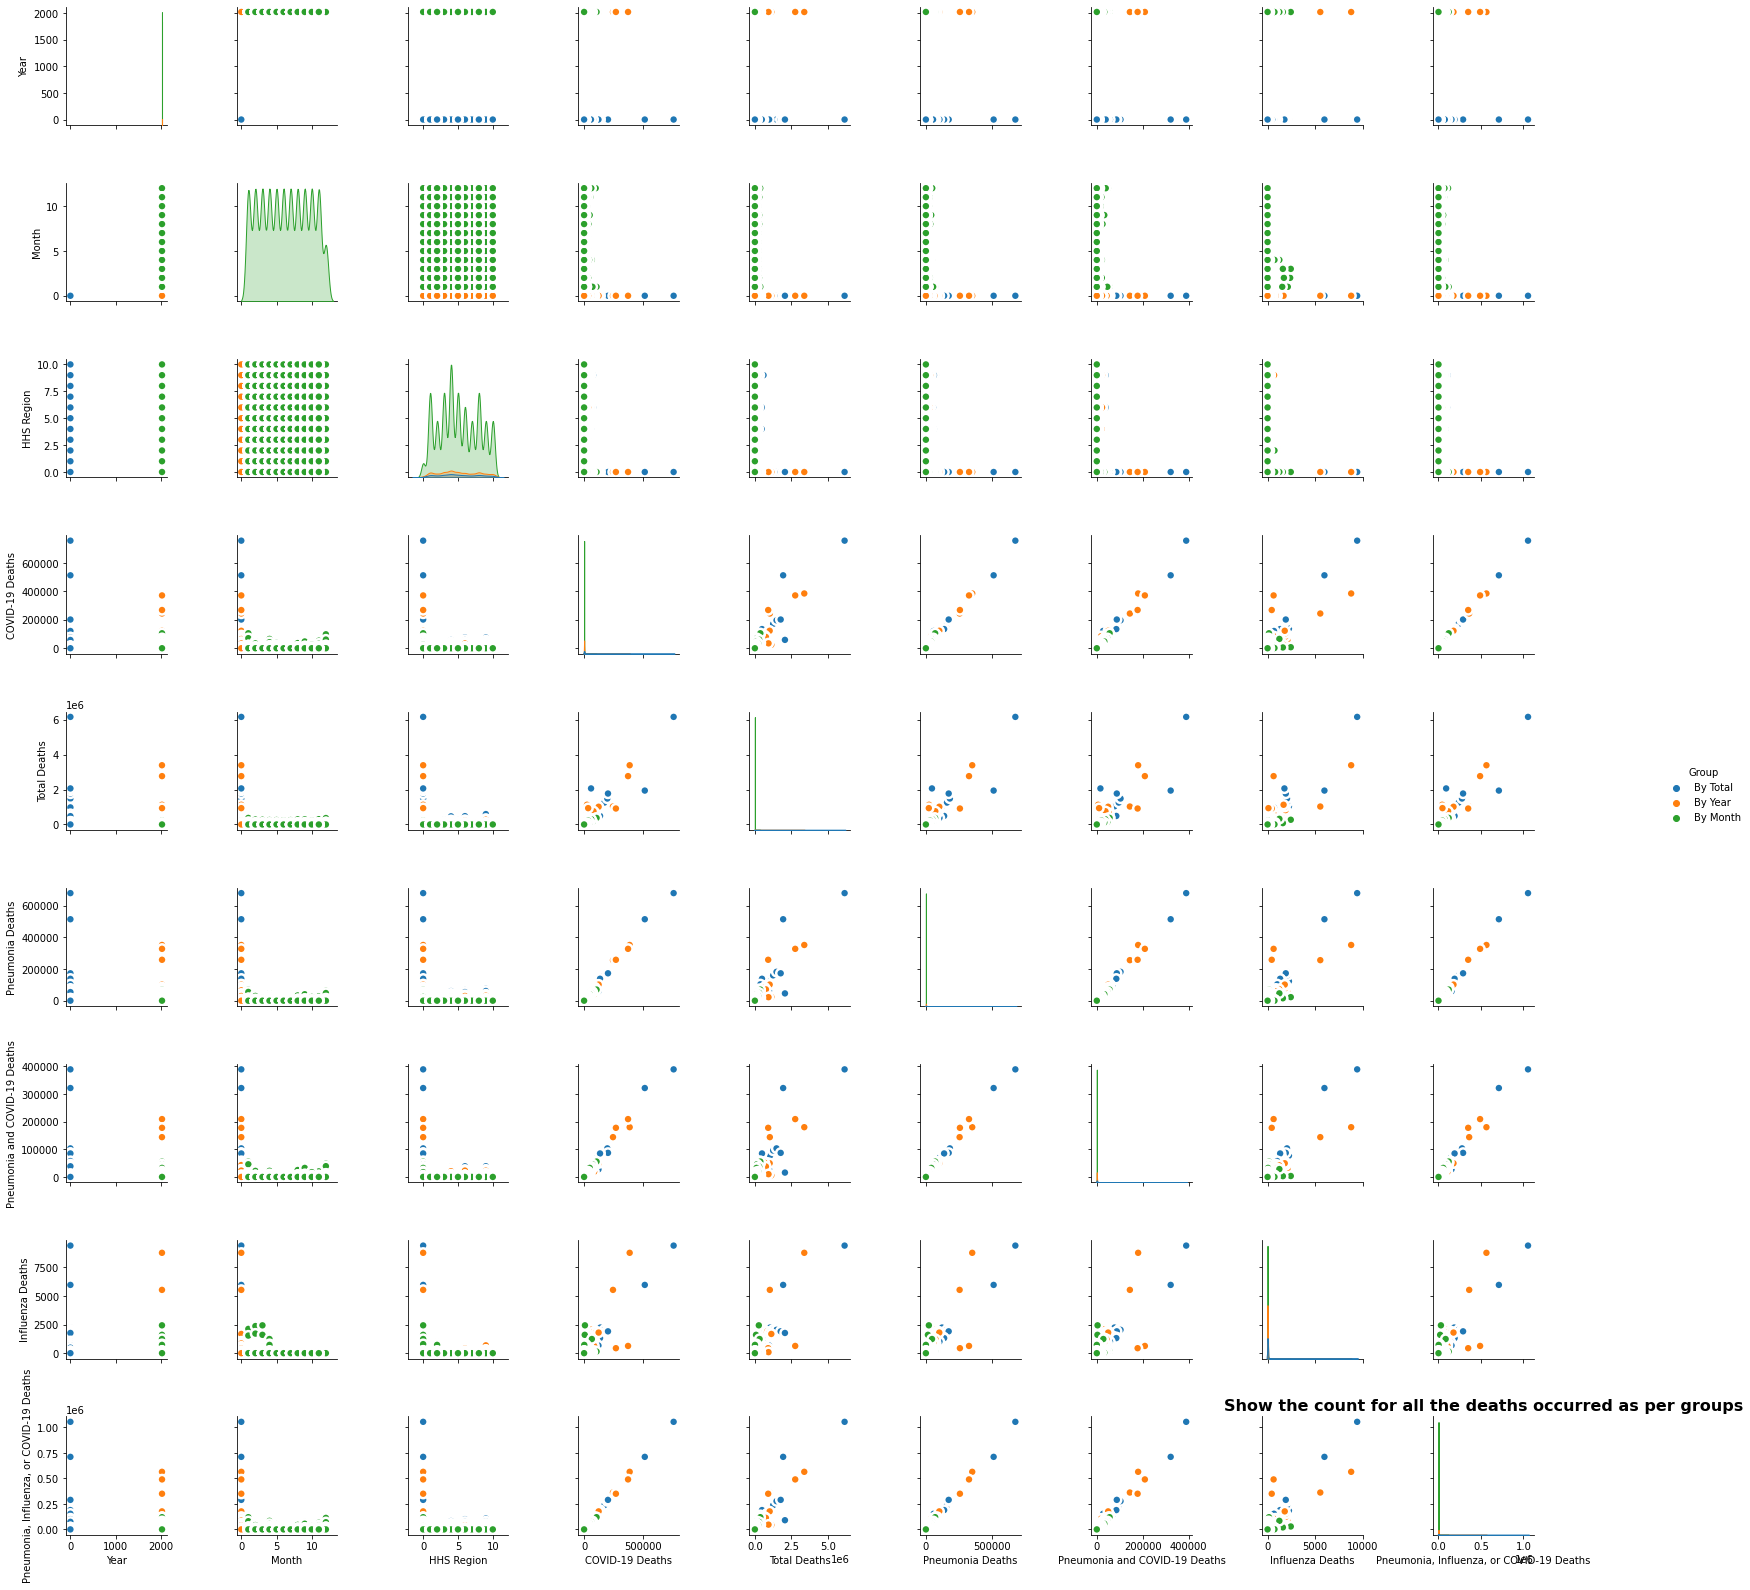

In [ ]:

#Q3 Show the count for all the deaths occurred as per groups
#Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(covid, kind="scatter", hue="Group", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.title("Show the count for all the deaths occurred as per groups",fontsize = 16, fontweight = 'bold')
plt.show()



Text(0.5, 1.0, 'Various places of death due to COVID-19')

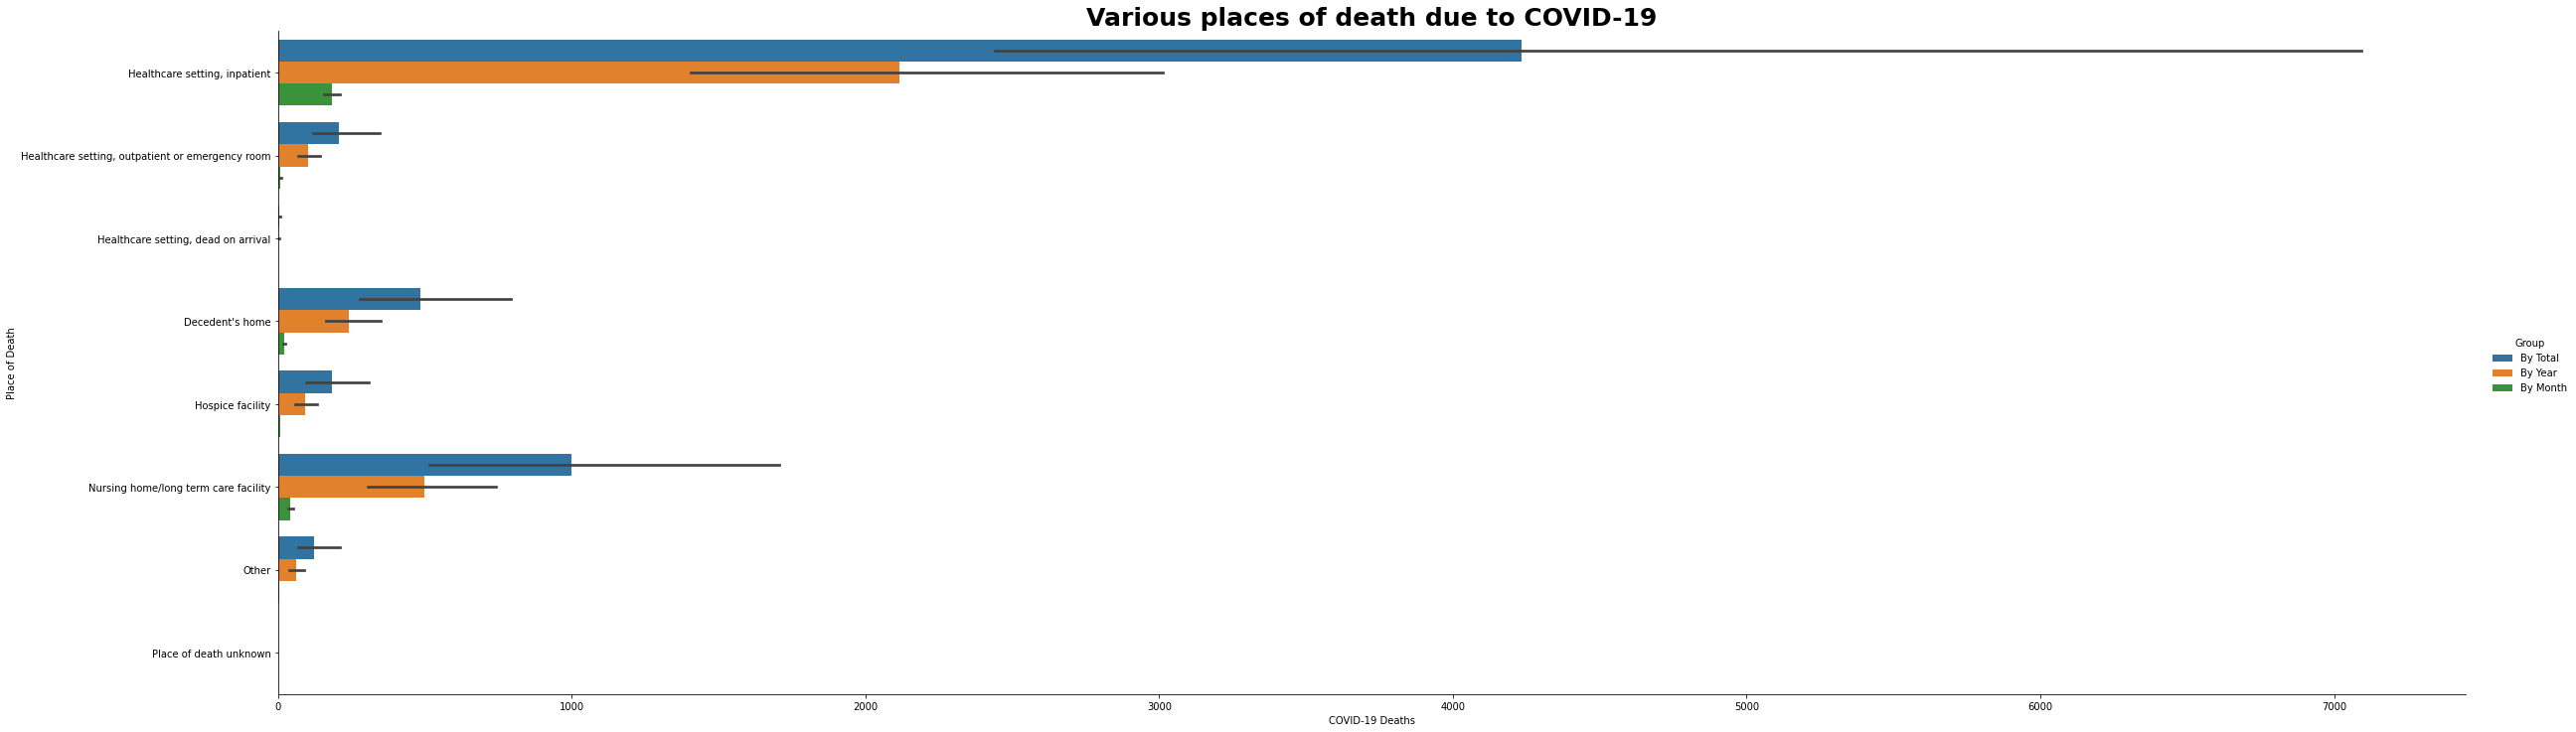

In [ ]:
#Q4 What are the various places of death due to COVID-19 as far as various groups are concerned?

import seaborn as sns
covid_Q4=covid[(covid['Place of Death']!='Total - All Places of Death')]
sns.catplot(x="COVID-19 Deaths", y="Place of Death", hue="Group", kind="bar", data=covid_Q4, height=10, aspect=3.5)
plt.title("Various places of death due to COVID-19",fontsize = 25, fontweight = 'bold')


Text(0.5, 1.0, 'Age group which is affected by COVID-19')

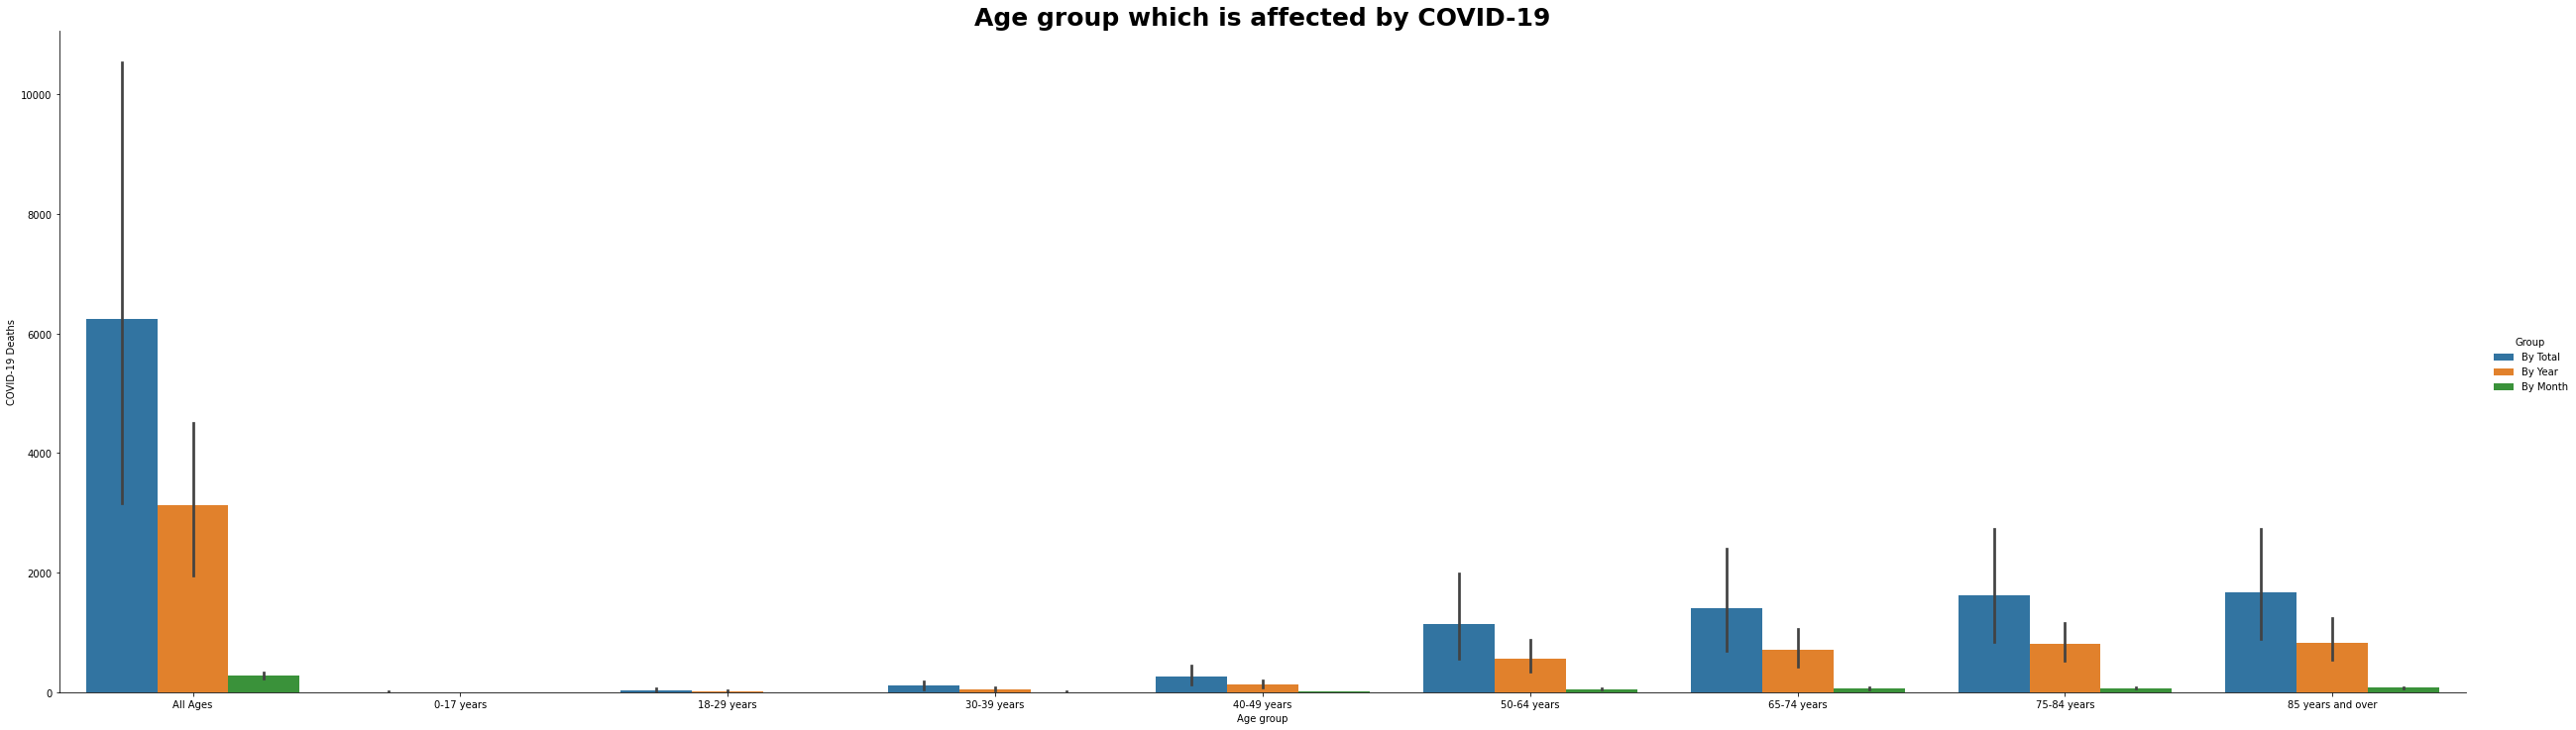

In [ ]:
#Q5-In which age group COVID-19 have affected widely?
#Ans- In all age groups, COVID-19 has been created a dynamic impact according to the dataset.
sns.catplot(x="Age group", y="COVID-19 Deaths", hue="Group", kind="bar", data=covid, height=10, aspect=3.5)
plt.title("Age group which is affected by COVID-19",fontsize = 25, fontweight = 'bold')



